# This notebook is for the main exploration of our Telco Churn data

In [303]:
from env import get_db_url
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats
from pydataset import data
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [304]:
# acquiring the needed dataset using a function from the acquire file

telco_churn = acquire.get_telco_data()

In [305]:
df = telco_churn
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [306]:
# this function from our prepare file is used to prep our dataframe
df = prepare.prep_telco_data(df)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,0,0,0,0,0,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,1,0,1,0,0,0,0,1


In [307]:
df = df.rename(columns = {"contract_type_Two year":"contract_type_Two_year", "contract_type_One year": "contract_type_one_year"})

In [308]:
train, val, test= prepare.split_data(df, 'churn')
train.shape, val.shape, test.shape

((3943, 48), (1691, 48), (1409, 48))

In [309]:
train.dtypes

customer_id                               object
gender                                    object
senior_citizen                             int64
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                             object
churn                                     object
contract_type                             object
internet_service_type                     object
payment_type        

# Are senior citizen more likely to churn?

- H_0: The mean of senior citizens who churn is <= the mean of those who are not senior citizens 

- H_a: The mean of senior citizens who churn is > the mean of those who are not senior citizens 

In [310]:
# this uses bolean masking to return customers who are senior citizens, and shows if they have churned
is_senior_citizen = train[train.senior_citizen == 1].churn_encoded 
is_senior_citizen

6832    0
3404    0
5279    0
3094    1
20      0
       ..
4543    1
2511    0
1013    0
4295    0
681     0
Name: churn_encoded, Length: 623, dtype: int64

<AxesSubplot:xlabel='churn_encoded', ylabel='Count'>

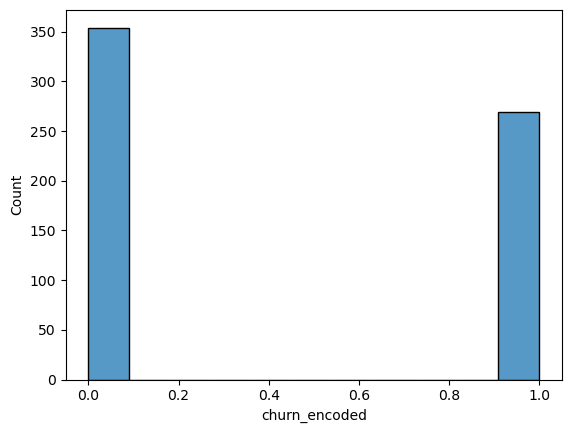

In [311]:
# histplot showing senior citizens who have or have not churned
sns.histplot(data = is_senior_citizen)

In [312]:
# this filters our dataframe for customers who are not senior citizens, and shows if they have churned or not
is_not_senior_citizen = train[train.senior_citizen == 0].churn_encoded 
is_not_senior_citizen

433     0
25      1
3196    0
4466    0
6030    0
       ..
1821    0
6933    1
2194    1
5309    0
2320    0
Name: churn_encoded, Length: 3320, dtype: int64

<AxesSubplot:xlabel='churn_encoded', ylabel='Count'>

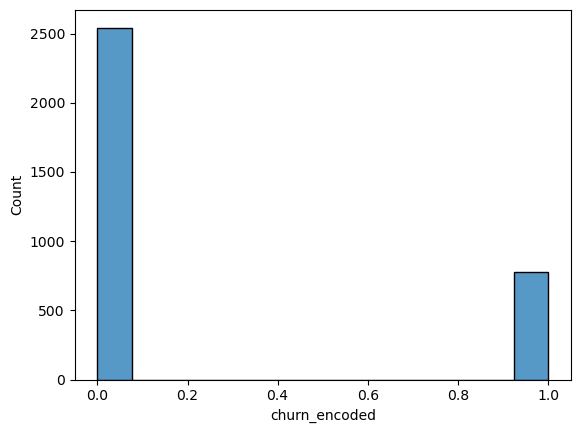

In [313]:
# histplot of non senior citizen customers who have churned or have not churned
sns.histplot(data= is_not_senior_citizen)

In [314]:
alpha = 0.05

In [315]:
# this returns our variance for both groups and shows that they are not equal
print(is_senior_citizen.var())
print(is_not_senior_citizen.var())

0.24574071111157159
0.17931723882574066


Text(0.5, 1.0, 'Senior Citizens Customers Who Churn vs. None Senior Citizens')

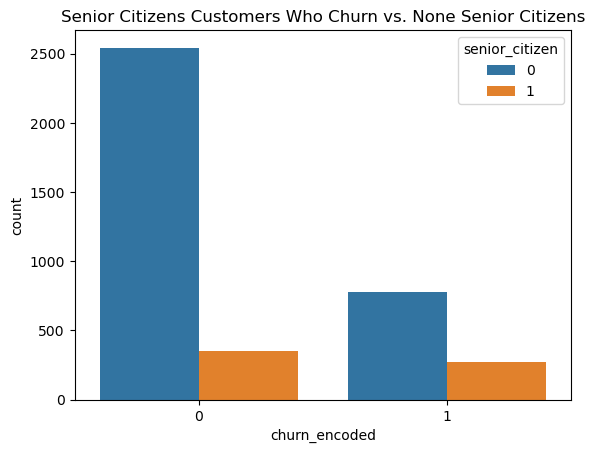

In [316]:
sns.countplot(data= train, x= 'churn_encoded', hue= 'senior_citizen')
plt.title('Senior Citizens Customers Who Churn vs. None Senior Citizens')

In [317]:
observed = pd.crosstab(train.senior_citizen, train.churn)
observed


churn,No,Yes
senior_citizen,,
0,2543,777
1,354,269


In [318]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


In [319]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')


Observed Values

[[2543  777]
 [ 354  269]]
---
Expected Values

[[2439  880]
 [ 457  165]]
---

chi^2 = 104.2292
p     = 0.0000


# Takeaways
- With the available data, and using the contingency tables, we are able to see that there is a significant 
   relationship between being a senior citizen and churn. This is further shown with our barplot.

-----

# Mean monthly charges of churned customers is higher than the overall average

In [320]:
train

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6832,9705-IOVQQ,Male,1,Yes,Yes,61,Yes,Yes,No,Yes,...,1,0,1,1,0,1,0,0,1,0
433,0635-WKOLD,Male,0,Yes,No,40,Yes,Yes,No,Yes,...,1,0,0,1,0,0,0,1,0,0
25,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,Yes,No,...,0,0,0,0,0,0,0,0,0,0
3196,4581-LNWUM,Female,0,No,No,13,No,No phone service,No,No,...,1,0,1,0,0,0,0,0,1,0
4466,6297-NOOPG,Female,0,Yes,No,70,Yes,Yes,No,Yes,...,1,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2657-VPXTA,Female,0,Yes,Yes,10,Yes,No,No,No,...,1,0,1,0,0,1,0,0,1,0
6933,9837-BMCLM,Male,0,No,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,1,0
2194,3144-AUDBS,Female,0,Yes,No,6,Yes,No,No,No,...,0,0,0,0,0,0,0,0,1,0
5309,7503-EPSZW,Female,0,Yes,Yes,64,Yes,Yes,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1


<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

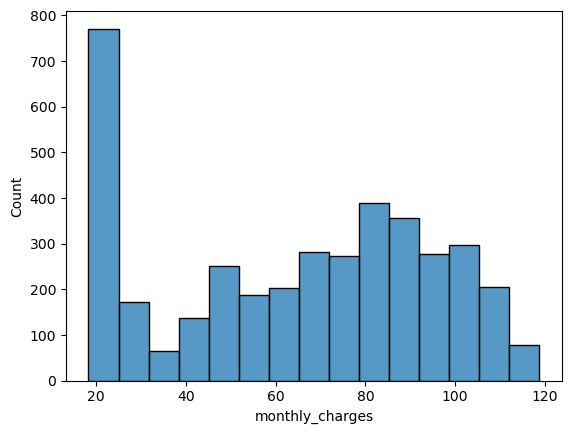

In [321]:
sns.histplot(data= train, x= 'monthly_charges')

In [324]:
overall_mean = train.monthly_charges.mean()
overall_mean

64.60090032969808

In [325]:
did_churn = train[train.churn == 'Yes']
did_churn


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
25,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,Yes,No,...,0,0,0,0,0,0,0,0,0,0
1528,2235-ZGKPT,Female,0,Yes,Yes,4,Yes,Yes,No,No,...,0,0,0,0,0,0,0,0,0,1
5615,7908-QCBCA,Female,0,Yes,No,1,Yes,No,No,No,...,0,0,0,0,0,1,0,0,0,1
2912,4143-HHPMK,Male,0,No,No,52,Yes,No,No,Yes,...,0,0,1,0,0,1,0,0,1,0
5146,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,No,No,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,6402-ZFPPI,Female,1,No,No,25,Yes,Yes,Yes,Yes,...,1,0,1,0,0,1,0,0,0,1
6743,9574-RKJIF,Male,0,Yes,Yes,30,Yes,Yes,Yes,Yes,...,1,0,0,0,0,1,0,0,1,0
1695,2472-OVKUP,Male,0,Yes,No,6,Yes,No,No,Yes,...,0,0,1,0,0,1,0,0,1,0
6933,9837-BMCLM,Male,0,No,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,1,0


<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

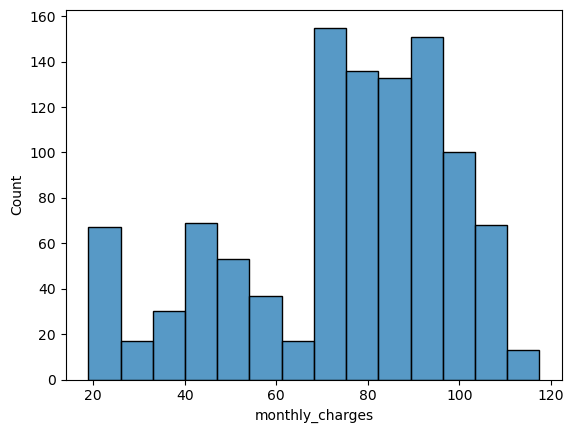

In [326]:
sns.histplot(data= did_churn, x= 'monthly_charges')

In [327]:
churn_mean = churn.monthly_charges.mean()
churn_mean

74.44133226324232

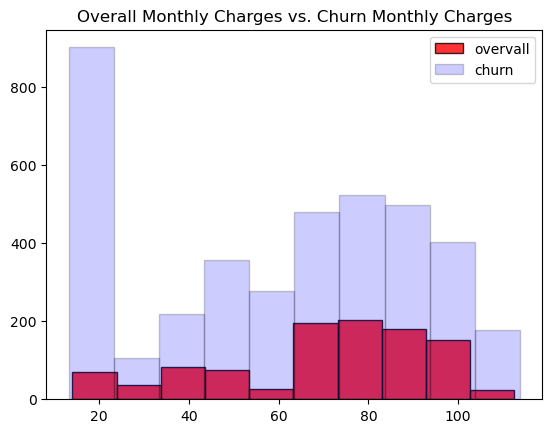

In [328]:
plt.hist(data= did_churn, x= 'monthly_charges', align='left', edgecolor='black', alpha=0.8, color='red', label= 'overvall')
plt.hist(data= train, x= 'monthly_charges', align='left', edgecolor='black', alpha=0.2, color='blue', label= 'churn')
plt.legend()
plt.title('Overall Monthly Charges vs. Churn Monthly Charges')
plt.show()

In [134]:
alpha= 0.05

In [329]:
train.churn.value_counts()

No     2897
Yes    1046
Name: churn, dtype: int64

In [331]:
train.dropna()
val.dropna()
test.dropna()
did_churn.dropna()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
25,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,Yes,No,...,0,0,0,0,0,0,0,0,0,0
1528,2235-ZGKPT,Female,0,Yes,Yes,4,Yes,Yes,No,No,...,0,0,0,0,0,0,0,0,0,1
5615,7908-QCBCA,Female,0,Yes,No,1,Yes,No,No,No,...,0,0,0,0,0,1,0,0,0,1
2912,4143-HHPMK,Male,0,No,No,52,Yes,No,No,Yes,...,0,0,1,0,0,1,0,0,1,0
5146,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,No,No,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,6402-ZFPPI,Female,1,No,No,25,Yes,Yes,Yes,Yes,...,1,0,1,0,0,1,0,0,0,1
6743,9574-RKJIF,Male,0,Yes,Yes,30,Yes,Yes,Yes,Yes,...,1,0,0,0,0,1,0,0,1,0
1695,2472-OVKUP,Male,0,Yes,No,6,Yes,No,No,Yes,...,0,0,1,0,0,1,0,0,1,0
6933,9837-BMCLM,Male,0,No,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,1,0


In [332]:
t, p = stats.ttest_1samp(did_churn.monthly_charges, overall_mean)

print('t value:', t,) 
print('p value:',  p/2, alpha)



t value: 13.387078523200328
p value: 3.880872809405724e-38 0.05


In [333]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


#  Is the churn mean differnent between each contract type?

In [334]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6832,9705-IOVQQ,Male,1,Yes,Yes,61,Yes,Yes,No,Yes,...,1,0,1,1,0,1,0,0,1,0
433,0635-WKOLD,Male,0,Yes,No,40,Yes,Yes,No,Yes,...,1,0,0,1,0,0,0,1,0,0
25,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,Yes,No,...,0,0,0,0,0,0,0,0,0,0
3196,4581-LNWUM,Female,0,No,No,13,No,No phone service,No,No,...,1,0,1,0,0,0,0,0,1,0
4466,6297-NOOPG,Female,0,Yes,No,70,Yes,Yes,No,Yes,...,1,0,1,0,1,1,0,0,1,0


In [335]:
one_year_contract = train[train.contract_type_one_year == 1]
one_year_contract

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6832,9705-IOVQQ,Male,1,Yes,Yes,61,Yes,Yes,No,Yes,...,1,0,1,1,0,1,0,0,1,0
433,0635-WKOLD,Male,0,Yes,No,40,Yes,Yes,No,Yes,...,1,0,0,1,0,0,0,1,0,0
3971,5593-SUAOO,Female,0,Yes,Yes,24,Yes,Yes,No,Yes,...,0,0,0,1,0,1,0,0,0,0
3173,4549-ZDQYY,Female,0,No,No,52,Yes,No,Yes,No,...,0,0,0,1,0,0,0,1,0,0
3404,4827-LTQRJ,Female,1,Yes,Yes,66,Yes,Yes,Yes,Yes,...,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,7716-YTYHG,Female,0,Yes,Yes,48,Yes,Yes,No,No,...,0,0,1,1,0,1,0,0,0,1
496,0727-BMPLR,Female,1,No,No,55,Yes,Yes,No,No,...,1,0,1,1,0,1,0,0,1,0
3245,4644-OBGFZ,Male,0,Yes,Yes,55,Yes,No,No internet service,No internet service,...,0,1,0,1,0,0,1,0,0,1
109,0193-ESZXP,Female,1,Yes,No,58,Yes,No,Yes,Yes,...,1,0,1,1,0,1,0,1,0,0


<AxesSubplot:xlabel='churn_encoded', ylabel='Count'>

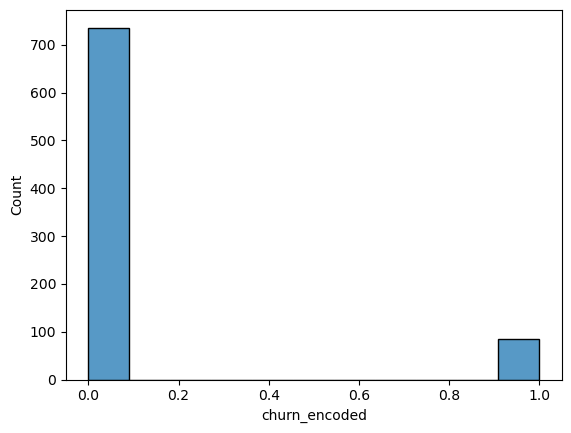

In [336]:
sns.histplot(data= one_year_contract, x= 'churn_encoded')

In [337]:
two_year_contract = train[train.contract_type_Two_year == 1]
two_year_contract

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4466,6297-NOOPG,Female,0,Yes,No,70,Yes,Yes,No,Yes,...,1,0,1,0,1,1,0,0,1,0
4142,5855-EIBDE,Female,0,Yes,No,49,Yes,Yes,Yes,Yes,...,0,0,1,0,1,1,0,1,0,0
5446,7665-NKLAV,Female,0,Yes,Yes,36,No,No phone service,Yes,No,...,0,0,0,0,1,0,0,1,0,0
1517,2228-BZDEE,Female,0,No,No,54,Yes,No,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
1355,2017-CCBLH,Female,0,No,No,8,Yes,No,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,1705-GUHPV,Female,0,No,No,63,Yes,Yes,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
4812,6770-UAYGJ,Female,0,Yes,Yes,49,Yes,Yes,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
5427,7639-LIAYI,Male,0,No,No,52,Yes,Yes,Yes,No,...,1,0,1,0,1,0,0,1,0,0
4295,6048-UWKAL,Female,1,Yes,No,69,Yes,Yes,No,Yes,...,1,0,1,0,1,1,0,1,0,0


<AxesSubplot:xlabel='churn_encoded', ylabel='Count'>

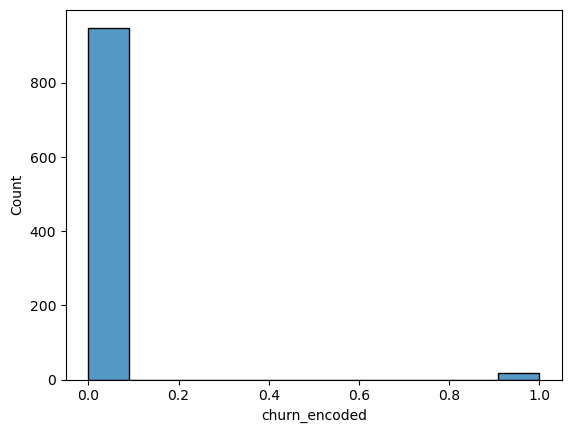

In [338]:
sns.histplot(data= two_year_contract, x= 'churn_encoded')

In [339]:
print(one_year_contract.churn_encoded.var())
print(two_year_contract.churn_encoded.var())

0.09205753595997387
0.019262736417479196


Text(0.5, 1.0, 'Churns Per Contract Type')

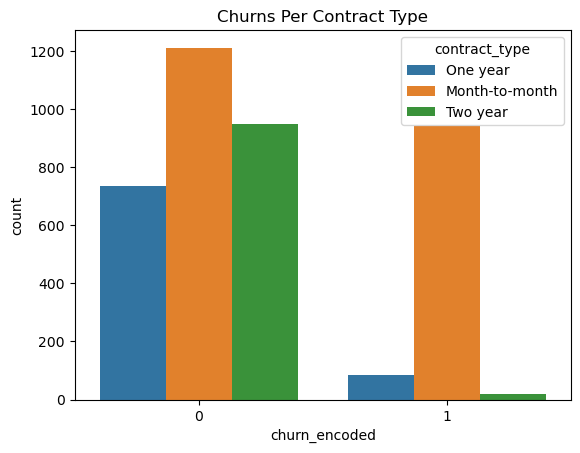

In [340]:
sns.countplot(data= train, x= 'churn_encoded', hue= 'contract_type')
plt.title('Churns Per Contract Type')

In [290]:
observed_2 = pd.crosstab(train.contract_type, train.churn)
observed_2

churn,No,Yes
contract_type,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


<AxesSubplot:xlabel='contract_type'>

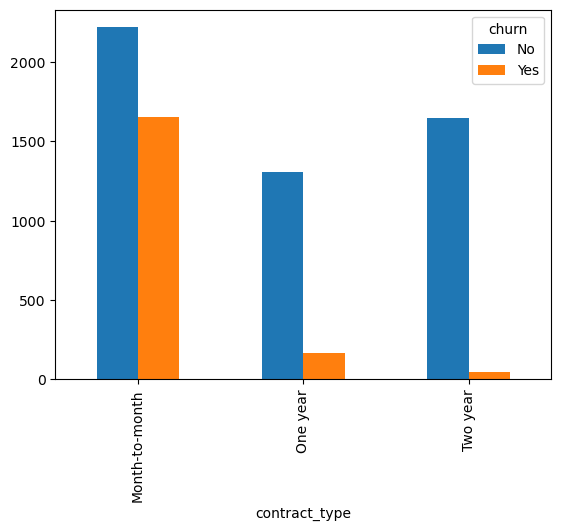

In [341]:
observed_2.plot.bar()

In [345]:
observed_contract=pd.crosstab(train['contract_type'], train.churn)
observed_contract

churn,No,Yes
contract_type,,
Month-to-month,1212,943
One year,736,84
Two year,949,19


H_0: The mean of churn is the same between each contract type

H_a: The mean of churn is differnt between each contract type

-----

# Do customers who have device protection churn more than customes without online protection?
 

In [382]:
no_Protection= train[train.device_protection_Yes == 1]
print(no_Protection.churn_encoded)



3196    0
4466    0
4142    0
3971    0
3173    0
       ..
1921    0
6965    0
3306    0
1013    0
1695    1
Name: churn_encoded, Length: 1351, dtype: int64


<AxesSubplot:xlabel='churn_encoded', ylabel='Count'>

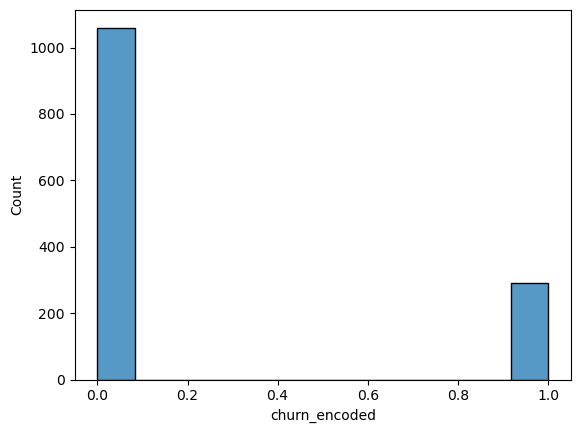

In [354]:
sns.histplot(data= no_Protection, x= 'churn_encoded')

In [361]:
yes_Protection= train[train.device_protection_Yes == 0]
yes_Protection.churn_encoded

6832    0
433     0
25      1
6030    0
1528    1
       ..
1821    0
6933    1
2194    1
5309    0
2320    0
Name: churn_encoded, Length: 2592, dtype: int64

<AxesSubplot:xlabel='churn_encoded', ylabel='Count'>

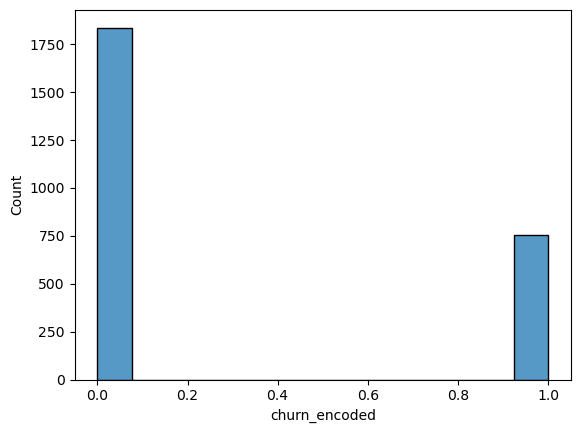

In [362]:
sns.histplot(data= yes_Protection, x= 'churn_encoded')

<AxesSubplot:xlabel='churn_encoded', ylabel='Count'>

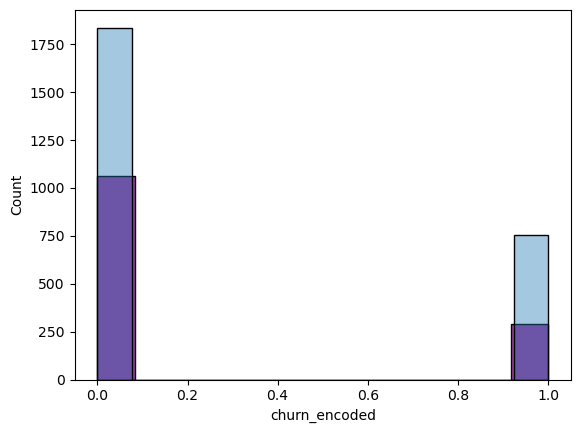

In [384]:
sns.histplot(data= no_Protection, x= 'churn_encoded', color= 'purple')
sns.histplot(data= yes_Protection, x= 'churn_encoded', alpha= .4)


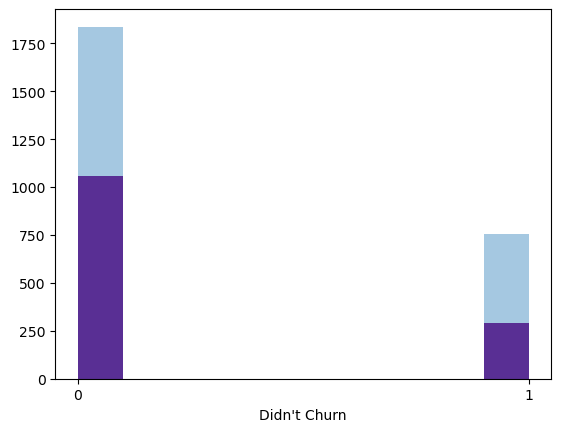

In [396]:
plt.hist(data= no_Protection, x= 'churn_encoded', color= 'purple')
plt.hist(data= yes_Protection, x= 'churn_encoded', alpha= .4)
plt.xticks(range(2))
plt.xlabel("Didn't Churn")
plt.show()


-----

# Modeling 

In [397]:
train.churn_encoded.value_counts()

0    2897
1    1046
Name: churn_encoded, dtype: int64

In [399]:
baseline=((train.churn_encoded == 0).sum())/len(train.churn)
baseline * 100

73.47197565305605

In [401]:
X_train = train.drop(columns=['churn'])
y_train = train.churn

X_val = val.drop(columns=['churn'])
y_val = val.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [402]:
X_train.shape, X_val.shape, X_test.shape

((3943, 47), (1691, 47), (1409, 47))